In [1]:
import fiona
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from rich import print_json
from IPython.display import display
import seaborn
import geopandas

# Liste des labos INS2I
LISN = LISN + LIMSI + LRI
LS2N = LS2N + LINA + IRCCyN
LIS = LIS + LSIS + LIF


In [2]:
# les id des labos sont ceux qu'ils ont ou ont eus depuis 2016, cf. https://aurehal.archives-ouvertes.fr/structure/index
listeLabosINS2I=(("CMP",{244423}), ("CRAN",{185180}), ("CREATIS",{139739}), ("CRIL",{90448,1628}), ("CRISTAL",{410272}), ("DI ENS",{25027}), ("ETIS",{1003474,1061575,1087906,1003348}), ("GIPSA-Lab",{1043333,1042376,24470}), ("GREYC",{150}), ("G-SCOP",{1043137,1041927,74240}),("HEUDIASYC",{389870}), ("I3S",{13009, 552896, 1079434}),("ICUBE",{217648,1073080}), ("IDRIS",{1823}), ("IRIF",{1005016,444497}), ("IRISA",{490899,105128,8621,2494}), ("IRIT",{34499,1082335}), ("ISIR",{541937,96164}), ("L2S",{1051117,1289}),("LAAS",{459}),("LABRI",{3102}), ("LAB-STICC",{486345,491660,199324,81533,1089048}), ("LAMIH",{1067790,1303}), ("LAMSADE",{989}), ("LIG",{1043301, 1041964,24471}),("LIGM",{1001627,3210}), ("LIMOS",{1063677,490706,857}),("LIP",{35418}),("LIP6",{541703,233,1095103}),("LIPN",{1000994,994,1086916,1056718}),("LIRIS",{2003,1086665}), ("LIRMM",{181,1071941}), ("LIS",{527033,199402,199394,862,178374}), ("LISN",{1061259,1041968,247329,2544,1050003,81750}), ("LIX",{2071,1041697,1071530,1070048}),("LORIA",{206040,466633}),("LS2N",{1088564,473973,95421,1693,21439}),("LMF-LSV",{1065710,1042689,2571}),("MDLS",{210816}),("STMS",{541779,1374}), ("TIMA",{1043043,1044023,640}),("TIMC IMAG",{1043049,1070489,1042061,707,574002,555959,1056575}),("VERIMAG",{1043148,1041816,194}))

In [26]:
listeLabosINS2I=(("LIRIS",{2003}),("LIS",{527033,199402,199394}), ("LAB-STICC",{486345,491660,199324,81533,1089048}))

In [12]:
listeCollectionsLabosINS2I=("CRAN", "CRIL", "CRISTAL", "ETIS", "GIPSA", "GREYC", "HEUDIASYC", "IPAL", "I3S", "IRIT", "IRISA", "ISIR", "UMI-3527", "LABRI", "LIP", "LAMIH", "LIMOS", "LPSM", "LAMSADE-DAUPHINE", "LS2N", "LAB-STICC", "G-SCOP", "LAAS", "LIG", "LIGM","LIX", "LIP6", "LIPN", "LIRIS", "LIRMM", "LIS-LAB", "LISN", "LORIA", "LMF", "SUP_LSS", "MDLS", "RELAX-AUTO", "ROOT-TOURS", "STMS", "TIMA", "VERIMAG")

In [36]:
listeCollectionsLabosINS2I=("CRAN","CRISTAL")

In [19]:
print(listeLabosINS2I[0]
)

NameError: name 'listeLabosINS2I' is not defined

In [43]:
listeLabosINS2I

(('CMP', {244423}),
 ('CRAN', {185180}),
 ('CREATIS', {139739}),
 ('CRIL', {1628, 90448}),
 ('CRISTAL', {410272}),
 ('DI ENS', {25027}),
 ('ETIS', {1003348, 1003474, 1061575, 1087906}),
 ('GIPSA-Lab', {24470, 1042376, 1043333}),
 ('GREYC', {150}),
 ('G-SCOP', {74240, 1041927, 1043137}),
 ('HEUDIASYC', {389870}),
 ('I3S', {13009, 552896, 1079434}),
 ('ICUBE', {217648, 1073080}),
 ('IDRIS', {1823}),
 ('IRIF', {444497, 1005016}),
 ('IRISA', {2494, 8621, 105128, 490899}),
 ('IRIT', {34499, 1082335}),
 ('ISIR', {96164, 541937}),
 ('L2S', {1289, 1051117}),
 ('LAAS', {459}),
 ('LABRI', {3102}),
 ('LAB-STICC', {81533, 199324, 486345, 491660, 1089048}),
 ('LAMIH', {1303, 1067790}),
 ('LAMSADE', {989}),
 ('LIG', {24471, 1041964, 1043301}),
 ('LIGM', {3210, 1001627}),
 ('LIMOS', {857, 490706, 1063677}),
 ('LIP', {35418}),
 ('LIP6', {233, 541703, 1095103}),
 ('LIPN', {994, 1000994, 1056718, 1086916}),
 ('LIRIS', {2003, 1086665}),
 ('LIRMM', {181, 1071941}),
 ('LIS', {862, 178374, 199394, 199402, 5

## Récupération des initiales des noms de pays
Liste http://documentation.abes.fr/sudoc/formats/CodesPays.htm
en usage dans le Sudoc, s'appuie sur la liste des codes de pays ISO 3166-1 alpha-2.

In [3]:
initialesPays = pd.read_csv("./Pays.csv",sep=';',header=None,names=['Nom','Initiales','ISO'])
initialesPays.set_index('Nom',inplace=True)
initialesPays.head()

,Initiales,ISO
Nom,,
Afghanistan,AF,AFG
Afrique du Sud,ZA,ZAF
"Åland, Îles",AX,NaN
Albanie,AL,ALB
Algérie,DZ,DZA


## Essais de requêtes sur les contenus et les référentiels

In [4]:
def lanceRequete (collection, req):
    reponses = requests.get("https://api.archives-ouvertes.fr/search/"+collection+"/?q="+req)
    #print_json(json.dumps(json.loads(reponses.text), indent=3))
    print_json(json.dumps(json.loads(reponses.text), indent=3))

### les champs des requêtes :
option "fq" définit les filtres (par exemple une plage)
option "facet" définit les facettes qui permettent de ventiler les réponses en groupes


In [18]:
# Essai de requête
recherche="structId_i:1042376&rows=10&fq=producedDateY_i:[2016 TO 2017]&wt=json"
reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)
j = json.loads(reponses.text)
print("Nombre documents trouvés : ",j['response']['numFound'])

Nombre documents trouvés :  1047


In [23]:
recherche="LS2N&fl=label_s,code_s,parentType_s,docid,aliasDocid_i&wt=json"
reponses = requests.get("https://api.archives-ouvertes.fr/ref/structure/?q="+recherche)
j = json.loads(reponses.text)
print(json.dumps(j, indent=3))

{
   "response": {
      "numFound": 20,
      "start": 0,
      "docs": [
         {
            "docid": 1040655,
            "label_s": "LS2N Laboratory"
         },
         {
            "docid": 1028564,
            "label_s": "LS2N NANTES FRA",
            "parentType_s": [
               "regrouplaboratory"
            ]
         },
         {
            "docid": 1071949,
            "label_s": "Universit\u00e9 de Nantes (LS2N)"
         },
         {
            "docid": 1072011,
            "label_s": "LS2N,  Universit\u00e9 de Nantes"
         },
         {
            "docid": 1057922,
            "label_s": "LS2N - Laboratoire des Sciences du Num\u00e9rique de Nantes"
         },
         {
            "docid": 1058007,
            "label_s": "LS2N - Laboratoire des Sciences du Num\u00e9rique de Nantes"
         },
         {
            "docid": 1057888,
            "label_s": "LS2N - Laboratoire des Sciences du Num\u00e9rique de Nantes"
         },
         {
          

## Nombre total de produits de la recherche dans HAL par labo selon l'id de structure, entre 2016 et 2020 compris

(obsolète) Nombre de publications par labo selon nom de structure

In [34]:
for labo in listeLabosINS2I:
    print(labo)
    recherche= "labStructAcronym_s:"+labo[0]+"&fq=producedDateY_i:[2016 TO 2017]&rows=10&fl=label_s,keyword_s&indent=true&wt=json"
    print(recherche)
    reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)
    j = json.loads(reponses.text)
    print("Nombre documents trouvés : ",j['response']['numFound'])
    #print(reponses.text)

('LIRIS', {2003})
labStructAcronym_s:LIRIS&fq=producedDateY_i:[2016 TO 2017]&rows=10&fl=label_s,keyword_s&indent=true&wt=json
Nombre documents trouvés :  801
('LIS', {527033, 199402, 199394})
labStructAcronym_s:LIS&fq=producedDateY_i:[2016 TO 2017]&rows=10&fl=label_s,keyword_s&indent=true&wt=json
Nombre documents trouvés :  330
('LAB-STICC', {486345})
labStructAcronym_s:LAB-STICC&fq=producedDateY_i:[2016 TO 2017]&rows=10&fl=label_s,keyword_s&indent=true&wt=json
Nombre documents trouvés :  0


In [4]:
def initStatsLabo ():
    npPublisLabo = list()
    for labo in listeLabosINS2I:
        npPublisLabo.append({"nom":labo[0]})
    #print(npPublisLabo)
    global statsLabo
    statsLabo = pd.DataFrame(npPublisLabo)
    statsLabo.set_index('nom',inplace=True)
    statsLabo["Total"]=0
    statsLabo["COMM"]=0
    statsLabo["ART"]=0
    statsLabo["THESE"]=0
    statsLabo["HDR"]=0
    statsLabo["COUV"]=0
    statsLabo["REPORT"]=0
    statsLabo["DOUV"]=0
    statsLabo["POSTER"]=0
    statsLabo["UNDEFINED"]=0
    statsLabo["OTHER"]=0
    statsLabo["LECTURE"]=0
    statsLabo["PATENT"]=0
    statsLabo["OUV"]=0
    statsLabo["SOFTWARE"]=0
    statsLabo["MEM"]=0
    statsLabo["PRESCONF"]=0
    statsLabo["SYNTHESE"]=0
    #statsLabo["REPORT_GMAST"]=0 #valeur nulle pour tous les labos
    statsLabo["OTHERREPORT"]=0
    statsLabo["VIDEO"]=0

In [39]:
# ici seul le total par labo est calculé
initStatsLabo()
for labo in listeLabosINS2I:
    print(labo)
    listeIds = "("
    premierId = True
    for id in labo[1]:
        if not premierId:
            listeIds += " OR "
        else:
            premierId = False
        listeIds += str(id)
    listeIds += ")"
    recherche= "structId_i:"+listeIds+"&fq=producedDateY_i:[2016 TO 2017]&rows=0&fl=label_s,keyword_s&indent=true&wt=json"
    reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)
    j = json.loads(reponses.text)
    print("Nombre documents trouvés : ",j['response']['numFound'])
    statsLabo.loc[labo[0]]['Total'] += j['response']['numFound']
    #print(reponses.text)
#print(statsLabo)

('LIRIS', {2003})
Nombre documents trouvés :  787
('LIS', {527033, 199402, 199394})
Nombre documents trouvés :  736
('LAB-STICC', {199324, 1089048, 486345, 491660, 81533})
Nombre documents trouvés :  1469


In [8]:
initStatsLabo()
for labo in listeLabosINS2I:
    print(labo)
    listeIds = "("
    premierId = True
    for id in labo[1]:
        if not premierId:
            listeIds += " OR "
        else:
            premierId = False
        listeIds += str(id)
    listeIds += ")"
    recherche= "structId_i:"+listeIds+"&fq=producedDateY_i:[2016 TO 2020]&rows=0&indent=true&wt=json&facet=true&facet.pivot=docType_s"
    try:
        reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche, timeout=(300,300))
    except requests.ReadTimeout:
        print ("temps limite atteint")
    j = json.loads(reponses.text)
    #print(json.dumps(j, indent=3))
    for donnees in  j['facet_counts']['facet_pivot']['docType_s']:
        if donnees['value'] in statsLabo: #on ne conserve les stats que pour les types choisis à l'initialisation du dataframe
            statsLabo.loc[labo[0]][donnees['value']] += donnees['count']
    #print("Nombre documents trouvés : ",j['response']['numFound'])
    statsLabo.loc[labo[0]].Total += j['response']['numFound']
display(statsLabo)

('CMP', {244423})
('CRAN', {185180})
('CREATIS', {139739})
('CRIL', {90448, 1628})
('CRISTAL', {410272})
('DI ENS', {25027})
('ETIS', {1003474, 1087906, 1003348, 1061575})
('GIPSA-Lab', {1042376, 1043333, 24470})
('GREYC', {150})
('G-SCOP', {74240, 1043137, 1041927})
('HEUDIASYC', {389870})
('I3S', {552896, 13009, 1079434})
('ICUBE', {217648, 1073080})
('IDRIS', {1823})
('IRIF', {1005016, 444497})
('IRISA', {105128, 490899, 8621, 2494})
('IRIT', {34499, 1082335})
('ISIR', {541937, 96164})
('L2S', {1289, 1051117})


KeyboardInterrupt: 

In [47]:
statsLabo.to_csv("statsLaboParType.csv")

In [9]:
statsLabo = pd.read_csv("statsLaboParType.csv", index_col=0)

In [10]:
display(statsLabo)

,Total,COMM,ART,THESE,HDR,COUV,REPORT,DOUV,POSTER,UNDEFINED,OTHER,LECTURE,PATENT,OUV,SOFTWARE,MEM,PRESCONF,SYNTHESE,OTHERREPORT,VIDEO
nom,,,,,,,,,,,,,,,,,,,,
CMP,9,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CRAN,1938,950,732,107,10,52,16,25,7,16,4,0,12,7,0,0,0,0,0,0
CREATIS,1455,573,678,83,3,15,1,4,74,7,4,5,8,0,0,0,0,0,0,0
CRIL,305,220,46,7,2,8,2,8,0,5,1,0,0,4,2,0,0,0,0,0
CRISTAL,2929,1506,903,145,13,71,51,33,44,96,19,3,6,30,0,4,4,1,0,0
DI ENS,1053,526,219,109,1,14,31,13,6,113,4,1,2,7,1,3,3,0,0,0
ETIS,586,300,187,29,4,19,2,11,6,17,2,1,5,2,0,1,0,0,0,0
GIPSA-Lab,2446,1118,850,167,4,96,35,13,49,51,19,0,13,10,10,9,0,0,0,2
GREYC,882,438,268,59,8,18,6,18,21,20,7,0,4,11,4,0,0,0,0,0


In [14]:
# Même code que ci-dessus mais avec les collections de labo et non pas les IDs
initStatsLabo()
for labo in listeCollectionsLabosINS2I:
    print(labo)
    recherche= "*:*&fq=producedDateY_i:[2016 TO 2020]&rows=0&indent=true&wt=json&facet=true&facet.pivot=docType_s"
    requete = "https://api.archives-ouvertes.fr/search/"+labo+"/?q="+recherche
    print(requete)
    try:
        reponses = requests.get(requete, timeout=(300,300))
    except requests.ReadTimeout:
        print ("temps limite atteint")
    j = json.loads(reponses.text)
    #print(json.dumps(j, indent=3))
    for donnees in  j['facet_counts']['facet_pivot']['docType_s']:
        if donnees['value'] in statsLabo: #on ne conserve les stats que pour les types choisis à l'initialisation du dataframe
            statsLabo.loc[labo][donnees['value']] += donnees['count']
    #print("Nombre documents trouvés : ",j['response']['numFound'])
    statsLabo.loc[labo].Total += j['response']['numFound']
display(statsLabo)

CRAN
https://api.archives-ouvertes.fr/search/CRAN/?q=*:*&fq=producedDateY_i:[2016 TO 2020]&rows=0&indent=true&wt=json&facet=true&facet.pivot=docType_s


KeyError: 'C'

## Nombre de publications par labo et par année de production de l'article

In [48]:
statsParAnneeLabo = pd.DataFrame()
for labo in listeLabosINS2I:
    print(labo)
    anneeDebut = 2016
    anneeFin = 2020
    evolutionLabo = pd.DataFrame()
    for x in range(anneeDebut,anneeFin+1):
        data = {
            "Année" : [x],
            "Nom":labo[0],
            "Total" : [0],
            "COMM" : [0],
            "ART" : [0],
            "COUV" : [0],
            "DOUV" : [0],
            "OUV" : [0],
            "THESE" : [0],
            "HDR" : [0]
        }
        evolutionLabo = pd.concat([evolutionLabo, pd.DataFrame(data)], ignore_index=True)
    evolutionLabo.set_index(['Année'], inplace=True)
    listeIds = "("
    premierId = True
    for id in labo[1]:
        if not premierId:
            listeIds += " OR "
        else:
            premierId = False
        listeIds += str(id)
    listeIds += ")"
    recherche= "structId_i:"+listeIds+"&fq=producedDateY_i:[2016 TO 2020]&rows=0&indent=true&wt=json&facet=true&facet.pivot=producedDateY_i,docType_s"
    try:
        reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche, timeout=(300,300))
    except requests.ReadTimeout:
        print ("temps limite atteint")
    j = json.loads(reponses.text)
    #print(json.dumps(j, indent=3))
    for donnees in  j['facet_counts']['facet_pivot']['producedDateY_i,docType_s']:
        annee = donnees['value']
        #print (annee, " : ")
        for statsAnnee in donnees['pivot']:
            if statsAnnee['value'] in evolutionLabo:
                #print (statsAnnee['value']," : ",statsAnnee['count'])
                evolutionLabo.loc[annee,statsAnnee['value']] += statsAnnee['count'] #addition pour tenir compte des différents ids des labos
                evolutionLabo.loc[annee,'Total'] += statsAnnee['count']
    #display(evolutionLabo)
    statsParAnneeLabo = pd.concat([statsParAnneeLabo, evolutionLabo])
display(statsParAnneeLabo)

('CMP', {244423})
('CRAN', {185180})
('CREATIS', {139739})
('CRIL', {90448, 1628})
('CRISTAL', {410272})
('DI ENS', {25027})
('ETIS', {1003474, 1087906, 1003348, 1061575})
('GIPSA-Lab', {1042376, 1043333, 24470})
('GREYC', {150})
('G-SCOP', {74240, 1043137, 1041927})
('HEUDIASYC', {389870})
('I3S', {552896, 13009, 1079434})
('ICUBE', {217648, 1073080})
('IDRIS', {1823})
('IRIF', {1005016, 444497})
('IRISA', {105128, 490899, 8621, 2494})
('IRIT', {34499, 1082335})
('ISIR', {541937, 96164})
('L2S', {1289, 1051117})
('LAAS', {459})
('LABRI', {3102})
('LAB-STICC', {199324, 1089048, 486345, 491660, 81533})
('LAMIH', {1067790, 1303})
('LAMSADE', {989})
('LIG', {1041964, 1043301, 24471})
('LIGM', {3210, 1001627})
('LIMOS', {857, 490706, 1063677})
('LIP', {35418})
('LIP6', {233, 541703, 1095103})
('LIPN', {1000994, 994, 1086916, 1056718})
('LIRIS', {1086665, 2003})
('LIRMM', {1071941, 181})
('LIS', {199394, 178374, 527033, 199402, 862})
('LISN', {1041968, 247329, 2544, 1050003, 81750, 1061259}

,Nom,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR
Année,,,,,,,,,
2016,CMP,2,1,1,0,0,0,0,0
2017,CMP,5,2,3,0,0,0,0,0
2018,CMP,2,2,0,0,0,0,0,0
2019,CMP,0,0,0,0,0,0,0,0
2020,CMP,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2016,VERIMAG,65,40,14,3,0,0,7,1
2017,VERIMAG,50,27,11,0,1,0,11,0
2018,VERIMAG,60,32,13,2,1,2,10,0


In [49]:
statsParAnneeLabo.to_csv("StatsParAnneeLabo.csv")

In [50]:
statsParAnneeLabo = pd.read_csv("StatsParAnneeLabo.csv", index_col=0)

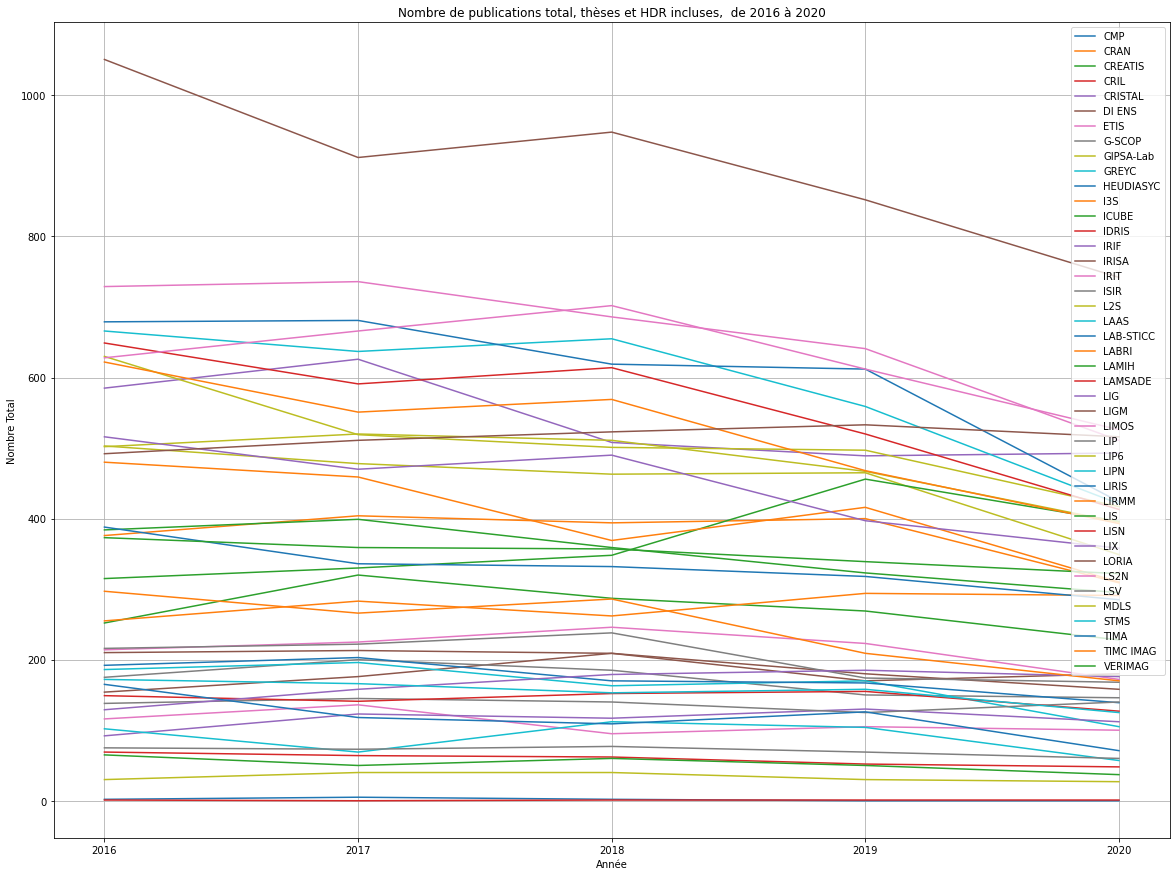

In [51]:
statsParAnneeLabo.groupby('Nom')['Total'].plot(title='Nombre de publications total, thèses et HDR incluses,  de 2016 à 2020',figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre Total")
plt.legend()
plt.grid(True)

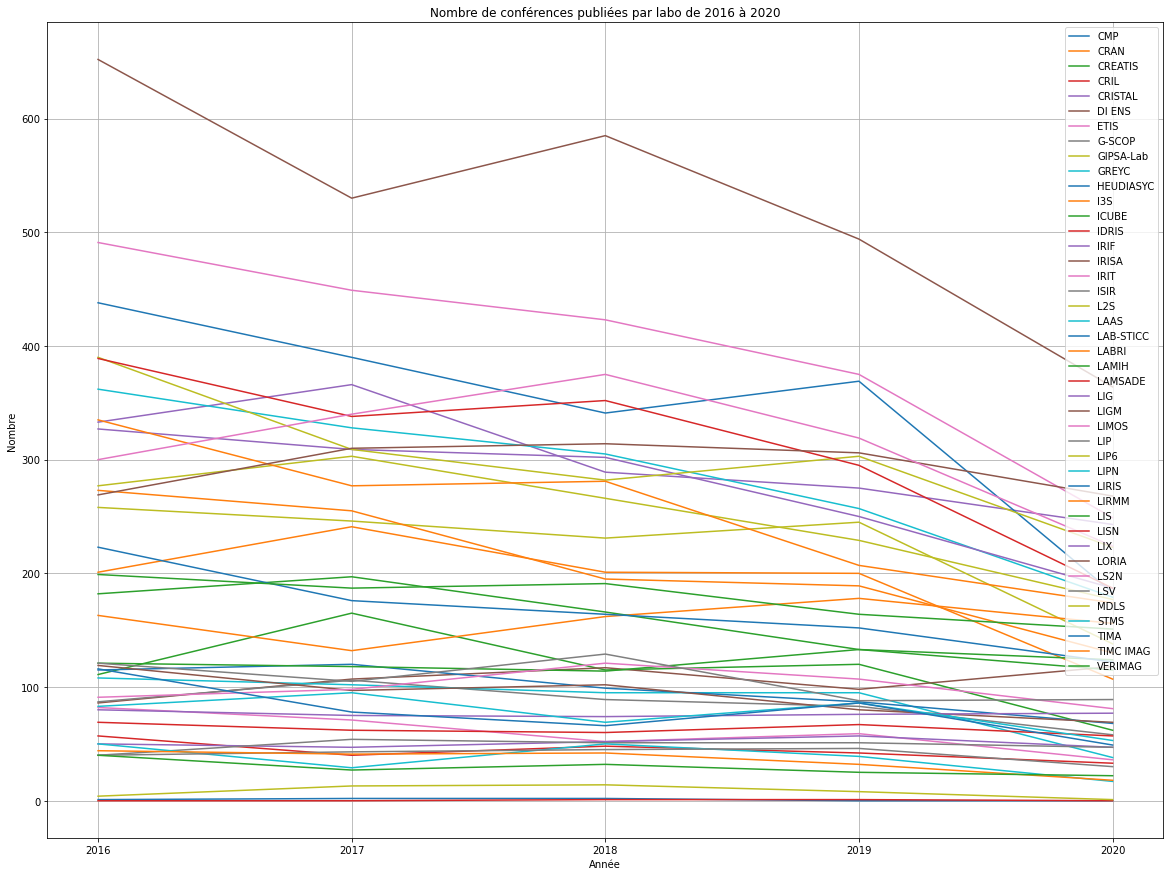

In [52]:
statsParAnneeLabo.groupby('Nom')['COMM'].plot(title='Nombre de conférences publiées par labo de 2016 à 2020',figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre")
plt.legend()
plt.grid(True)

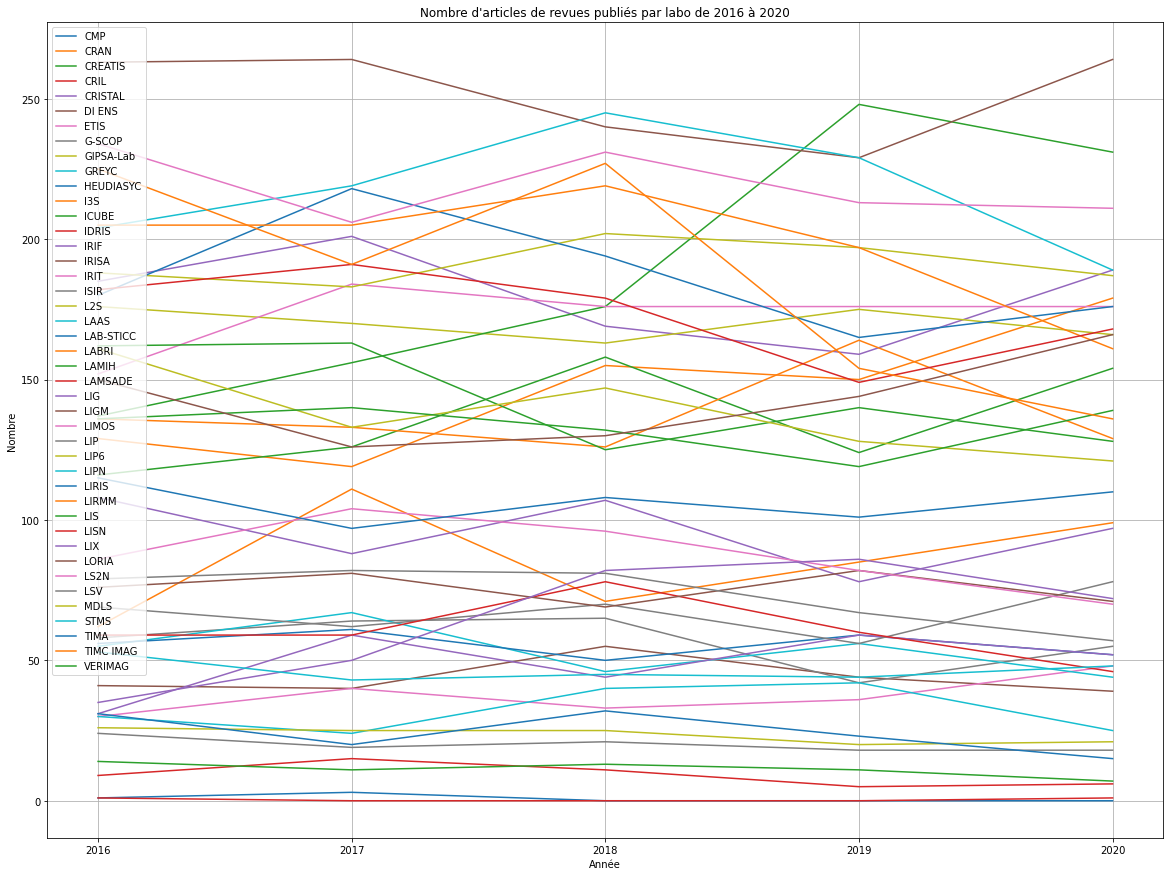

In [53]:
statsParAnneeLabo.groupby('Nom')['ART'].plot(title="Nombre d'articles de revues publiés par labo de 2016 à 2020",figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre")
plt.legend()
plt.grid(True)

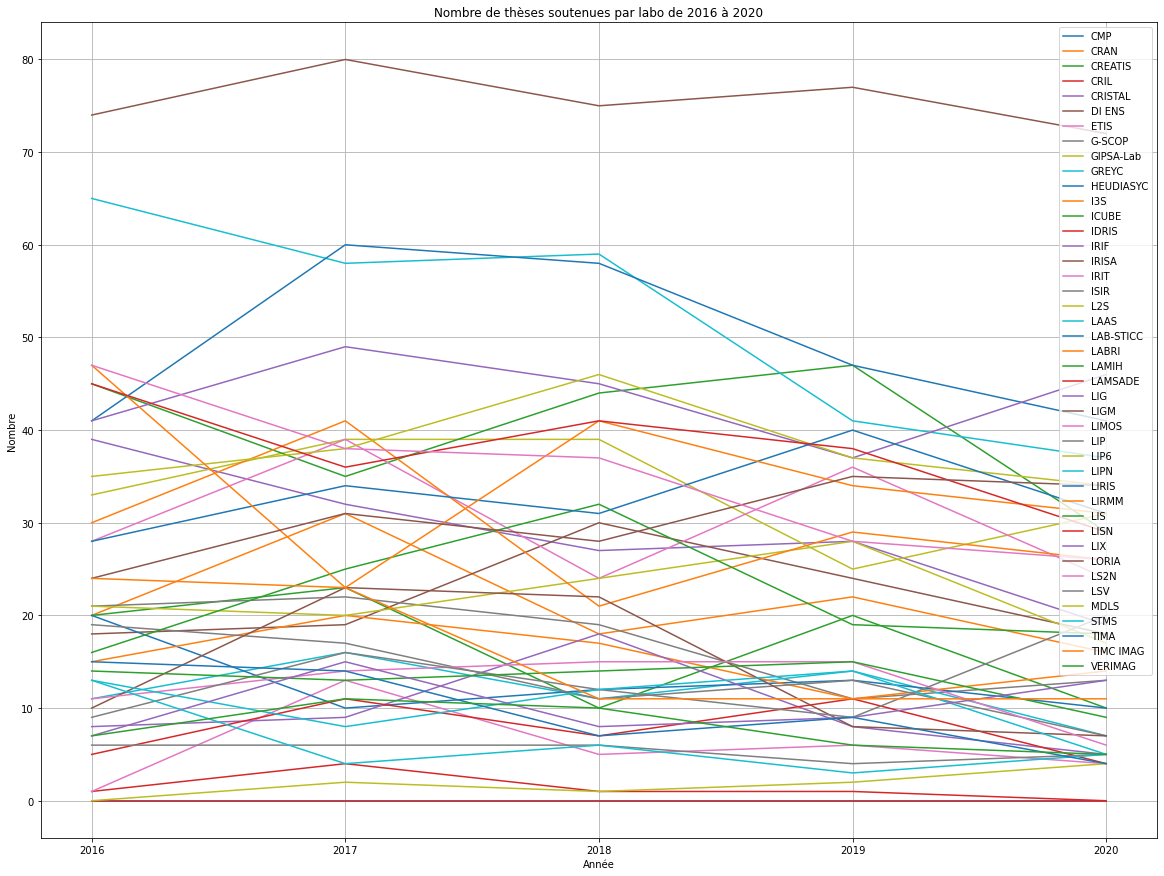

In [54]:
statsParAnneeLabo.groupby('Nom')['THESE'].plot(title="Nombre de thèses soutenues par labo de 2016 à 2020",figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre")
plt.legend()
plt.grid(True)

In [55]:
statsParAnneeLabo

,Nom,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR
Année,,,,,,,,,
2016,CMP,2,1,1,0,0,0,0,0
2017,CMP,5,2,3,0,0,0,0,0
2018,CMP,2,2,0,0,0,0,0,0
2019,CMP,0,0,0,0,0,0,0,0
2020,CMP,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2016,VERIMAG,65,40,14,3,0,0,7,1
2017,VERIMAG,50,27,11,0,1,0,11,0
2018,VERIMAG,60,32,13,2,1,2,10,0


### Evolution par année du nombre total de publications

In [56]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iTotalPubli = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Total')
display(ins2iTotalPubli)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,2,5,2,0,0
CRAN,376,404,394,400,309
CREATIS,252,320,287,269,228
CRIL,69,64,62,52,48
CRISTAL,585,626,508,489,493
DI ENS,154,176,209,170,180
ETIS,116,136,95,105,100
G-SCOP,175,200,185,150,146
GIPSA-Lab,503,478,463,465,349


### Evolution par année du nombre de conférences

In [57]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iNbConf = statsPourPivot.pivot(index="Nom", columns=["Année"], values='COMM')
display(ins2iNbConf)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,1,2,2,0,0
CRAN,201,241,201,200,107
CREATIS,111,165,115,120,62
CRIL,57,40,48,42,33
CRISTAL,333,366,289,275,243
DI ENS,86,107,117,98,118
ETIS,82,71,52,59,36
G-SCOP,87,106,89,83,58
GIPSA-Lab,258,246,231,245,138


### Evolution par année du nombre d'articles de revues

In [58]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iNbART = statsPourPivot.pivot(index="Nom", columns=["Année"], values='ART')
display(ins2iNbART)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,1,3,0,0,0
CRAN,129,119,155,150,179
CREATIS,116,126,158,124,154
CRIL,9,15,11,5,6
CRISTAL,185,201,169,159,189
DI ENS,41,40,55,44,39
ETIS,30,40,33,36,48
G-SCOP,58,64,65,42,55
GIPSA-Lab,176,170,163,175,166


### Evolution du nombre de thèses soutenues

In [59]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iNbTheses = statsPourPivot.pivot(index="Nom", columns=["Année"], values='THESE')
display(ins2iNbTheses)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,0,0,0,0,0
CRAN,20,31,18,22,16
CREATIS,20,23,10,20,10
CRIL,1,4,1,1,0
CRISTAL,39,32,27,28,19
DI ENS,18,19,30,24,18
ETIS,1,13,5,6,4
G-SCOP,21,22,19,11,13
GIPSA-Lab,33,39,39,25,31


In [60]:
statsParAnneeLabo.groupby('Année').describe()

Total                                                            COMM  \
      count        mean         std  min    25%    50%    75%     max count   
Année                                                                         
2016   43.0  326.139535  242.582395  1.0  143.5  252.0  502.5  1051.0  43.0   
2017   43.0  320.395349  226.760219  0.0  143.0  266.0  494.5   912.0  43.0   
2018   43.0  314.000000  223.604349  1.0  146.0  262.0  495.5   948.0  43.0   
2019   43.0  294.418605  205.364975  0.0  140.0  223.0  466.0   852.0  43.0   
2020   43.0  249.139535  173.510337  0.0  118.5  180.0  394.0   742.0  43.0   

                   ... THESE         HDR                                     \
             mean  ...   75%   max count      mean       std  min  25%  50%   
Année              ...                                                        
2016   180.860465  ...  31.5  74.0  43.0  1.767442  2.091220  0.0  0.0  1.0   
2017   171.581395  ...  34.5  80.0  43.0  1.302326  1.596647  0.0  0.0  1.0   
2018   164.279070  ...  31.5  75.0  43.0  1.395349  1.761216  0.0  0.0  1.0   
2019   151.302326  ...  31.5  77.0  43.0  1.581395  2.002767  0.0  0.0  1.0   
2020   110.953488  ...  27.5  72.0  43.0  1.116279  1.734926  0.0  0.0  0.0   

                 
       75%  max  
Année            
2016   2.5  7.0  
2017   2.0  8.0  
2018   2.0  7.0  
2019   2.5  9.0  
2020   1.0  7.0  

[5 rows x 64 columns]

In [61]:
statsParAnneeLabo.groupby('Nom')['ART'].sum()

Nom
CMP             4
CRAN          732
CREATIS       678
CRIL           46
CRISTAL       903
DI ENS        219
ETIS          187
G-SCOP        284
GIPSA-Lab     850
GREYC         268
HEUDIASYC     278
I3S           428
ICUBE         948
IDRIS           2
IRIF          245
IRISA        1260
IRIT          864
ISIR          335
L2S           957
LAAS         1086
LAB-STICC     933
LABRI         688
LAMIH         718
LAMSADE       302
LIG           478
LIGM          379
LIMOS         438
LIP           366
LIP6          690
LIPN          161
LIRIS         531
LIRMM         987
LIS           666
LISN          869
LIX           325
LORIA         716
LS2N         1095
LSV           100
MDLS          117
STMS          233
TIMA          121
TIMC IMAG     933
VERIMAG        56
Name: ART, dtype: int64

In [62]:
ins2i = statsParAnneeLabo.groupby('Année').sum()
display(ins2i)

,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR
Année,,,,,,,,
2016,14024,7777,4470,449,235,70,947,76
2017,13777,7378,4553,436,229,103,1022,56
2018,13502,7064,4636,491,204,92,955,60
2019,12660,6506,4416,508,188,89,885,68
2020,10713,4771,4401,497,156,93,747,48


Text(0, 0.5, 'Nombre total')

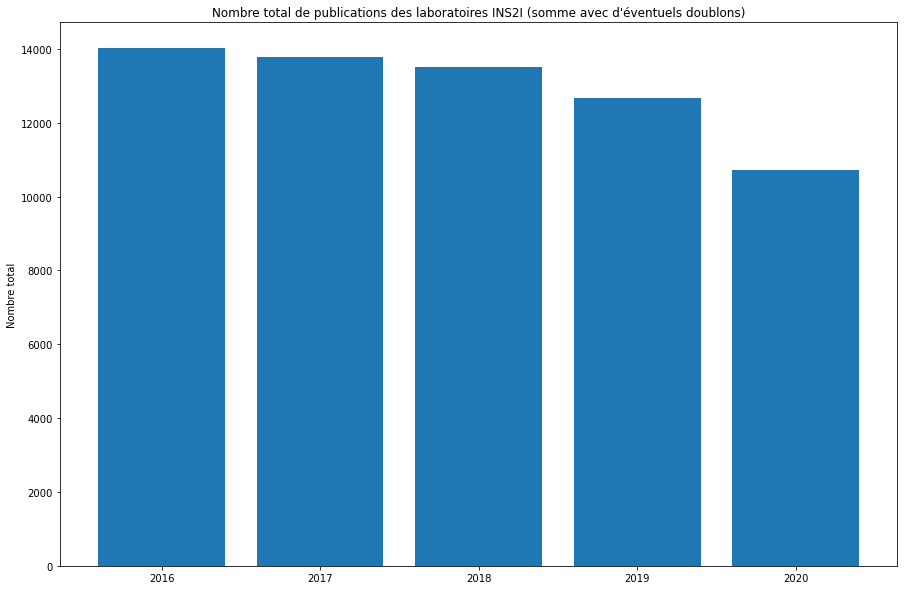

In [63]:
plt.figure(figsize=(15,10))
plt.bar(ins2i.index,ins2i['Total'])
plt.title("Nombre total de publications des laboratoires INS2I sur HAL (somme avec d'éventuels doublons)")
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre total")

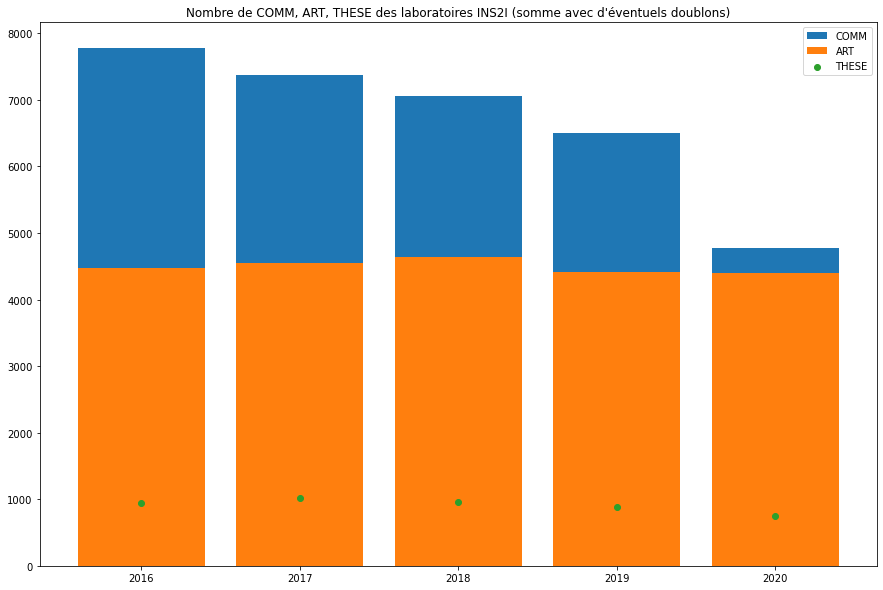

In [64]:
plt.figure(figsize=(15,10))
plt.title("Nombre de COMM, ART, THESE des laboratoires INS2I sur HAL (somme avec d'éventuels doublons)")
b1 = plt.bar(ins2i.index,ins2i['COMM'])
b2 = plt.bar(ins2i.index,ins2i['ART'])
b3 = plt.scatter(ins2i.index,ins2i['THESE'])
plt.legend([b1,b2,b3], ['COMM','ART','THESE'])

In [9]:
recherche = 'authFullName_t:Patrice+Bellot&sort=publicationDate_s desc&indent=true&rows=10&fl=label_s,keyword_s&facet=true&facet.field=keyword_s&wt=json'

In [10]:
reponses = requests.get("https://api.archives-ouvertes.fr/search/?q="+recherche)

In [11]:
j = json.loads(reponses.text)
print("Nombre documents trouvés : ",j['response']['numFound'])

Nombre documents trouvés :  145


In [115]:
print(reponses.text)

{
  "response":{"numFound":145,"start":0,"docs":[
      {
        "label_s":"Liana Ermakova, Patrice Bellot, Jaap Kamps, Diana Nurbakova, Irina Ovchinnikova, et al.. Automatic Simplification of Scientific Texts: SimpleText Lab at CLEF-2022. Advances in Information Retrieval, 13186, Springer International Publishing, pp.364-373, 2022, Lecture Notes in Computer Science, &#x27E8;10.1007/978-3-030-99739-7_46&#x27E9;. &#x27E8;hal-03637775&#x27E9;"},
      {
        "label_s":"Haytame Fallah, Patrice Bellot, Emmanuel Bruno, Elisabeth Murisasco. Architectures Transformeurs pour la classification multilabels de textes. BDA 2021 - 37ème Conférence sur la Gestion de Données – Principes, Technologies et Applications, Oct 2021, Paris, France. &#x27E8;hal-03489418&#x27E9;",
        "keyword_s":["Deep learning",
          "Transformers",
          "Language models",
          "Multilabel text classification",
          "BERT",
          "Deep Learning",
          "Apprentissage profond",
          "

-------------------------------------

In [12]:
recherche = "labStructAcronym_s:LIRIS&rows=10&fq=producedDateY_i:[2016 TO 2021]&wt=json"

In [13]:
reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)

In [14]:
print(json.dumps(json.loads(reponses.text), indent=3))

{
   "response": {
      "numFound": 2181,
      "start": 0,
      "docs": [
         {
            "docid": 1878010,
            "label_s": "Abir Masmoudi, Mahmoud Barhamgi, Noura Faci, Zohra Saoud, Khalid Belhajjame, et al.. An Ontology-Based Approach for Mining Radicalization Indicators from Online Messages. 2018 IEEE 32nd International Conference on Advanced Information Networking and Applications (AINA), May 2018, Krakow, Poland. pp.609-616, &#x27E8;10.1109/AINA.2018.00094&#x27E9;. &#x27E8;hal-01878010&#x27E9;",
            "uri_s": "https://hal.archives-ouvertes.fr/hal-01878010"
         },
         {
            "docid": 3390102,
            "label_s": "Alexandre Millot. Exceptional Model Mining meets Multi-Objective Optimization: Application to Plant Growth Recipes in Controlled Environments. Computer Science [cs]. INSA Lyon, 2021. English. &#x27E8;tel-03390102&#x27E9;",
            "uri_s": "https://hal.archives-ouvertes.fr/tel-03390102"
         },
         {
            "doc

## Recherche de publications communes avec un pays donné

In [73]:
# Interrogation avec les IDs des laboratoires (utile seulement pour les laboratoires qui n'ont pas de collection)
codePays='il'
anneeDebut = 2010
anneeFin = 2021

evolutionLabo = pd.DataFrame()
for labo in listeLabosINS2I:
    print(labo)
    data = {
        "Nom":labo[0],
        "Total" : [0]
    }
    for x in range(anneeDebut,anneeFin+1):
            data[x] = [0]
    evolutionLabo = pd.concat([evolutionLabo, pd.DataFrame(data)], ignore_index=True)
evolutionLabo.set_index(['Nom'], inplace=True)
#print(evolutionLabo)

for labo in listeLabosINS2I:
    print(labo)
    listeIds = "("
    premierId = True
    for id in labo[1]:
        if not premierId:
            listeIds += " OR "
        else:
            premierId = False
        listeIds += str(id)
    listeIds += ")"
    recherche= "structId_i:"+listeIds+"&fq=structCountry_s:"+codePays+"&fq=producedDateY_i:["+str(anneeDebut)+" TO "+str(anneeFin)+"]&rows=0&facet=true&facet.field=producedDateY_i&wt=json]"
    try:
        print("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)
        reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche, timeout=(300,300))
    except requests.ReadTimeout:
        print ("temps limite atteint")
    j = json.loads(reponses.text)
    #print(json.dumps(j, indent=3))
    evolutionLabo.loc[labo[0],"Total"] = j['response']['numFound']
    liste = j['facet_counts']['facet_fields']['producedDateY_i']
    i = 0
    while i < len(liste) :
        annee = int(liste[i])
        if annee in evolutionLabo.columns:
            evolutionLabo.loc[labo[0],annee] += liste[i+1]
        i += 2
display(evolutionLabo)

('CMP', {244423})
('CRAN', {185180})
('CREATIS', {139739})
('CRIL', {90448, 1628})
('CRISTAL', {410272})
('DI ENS', {25027})
('ETIS', {1003474, 1087906, 1003348, 1061575})
('GIPSA-Lab', {1042376, 1043333, 24470})
('GREYC', {150})
('G-SCOP', {74240, 1043137, 1041927})
('HEUDIASYC', {389870})
('I3S', {552896, 13009, 1079434})
('ICUBE', {217648, 1073080})
('IDRIS', {1823})
('IRIF', {1005016, 444497})
('IRISA', {105128, 490899, 8621, 2494})
('IRIT', {34499, 1082335})
('ISIR', {541937, 96164})
('L2S', {1289, 1051117})
('LAAS', {459})
('LABRI', {3102})
('LAB-STICC', {199324, 1089048, 486345, 491660, 81533})
('LAMIH', {1067790, 1303})
('LAMSADE', {989})
('LIG', {1041964, 1043301, 24471})
('LIGM', {3210, 1001627})
('LIMOS', {857, 490706, 1063677})
('LIP', {35418})
('LIP6', {233, 541703, 1095103})
('LIPN', {1000994, 994, 1086916, 1056718})
('LIRIS', {1086665, 2003})
('LIRMM', {1071941, 181})
('LIS', {199394, 178374, 527033, 199402, 862})
('LISN', {1041968, 247329, 2544, 1050003, 81750, 1061259}

,Total,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Nom,,,,,,,,,,,,,
CMP,0,0,0,0,0,0,0,0,0,0,0,0,0
CRAN,2,0,0,0,0,1,0,0,0,0,0,0,1
CREATIS,5,1,1,0,1,0,1,0,0,0,0,0,1
CRIL,2,0,2,0,0,0,0,0,0,0,0,0,0
CRISTAL,60,2,1,4,4,1,6,14,9,6,3,9,1
DI ENS,42,3,2,2,5,8,4,4,5,1,1,5,2
ETIS,2,0,0,1,0,0,0,1,0,0,0,0,0
GIPSA-Lab,25,2,0,0,1,1,4,6,5,4,2,0,0
GREYC,6,2,0,0,0,0,2,1,0,0,1,0,0


In [82]:
# Interrogation des collections des laboratoires
codePays='il'
anneeDebut = 2010
anneeFin = 2021

evolutionLabo = pd.DataFrame()
for labo in listeCollectionsLabosINS2I:
    print(labo)
    data = {
        "Nom":labo,
        "Total" : [0]
    }
    for x in range(anneeDebut,anneeFin+1):
        data[x] = [0]
    evolutionLabo = pd.concat([evolutionLabo, pd.DataFrame(data)], ignore_index=True)
evolutionLabo.set_index(['Nom'], inplace=True)
#print(evolutionLabo)

for labo in listeCollectionsLabosINS2I:
    print(labo)
    recherche= "fq=structCountry_s:"+codePays+"&fq=producedDateY_i:["+str(anneeDebut)+" TO "+str(anneeFin)+"]&rows=0&facet=true&facet.field=producedDateY_i&wt=json]"
    try:
        requete = "https://api.archives-ouvertes.fr/search/"+labo+"/?q=*:*&"+recherche
        print(requete)
        reponses = requests.get(requete, timeout=(300,300))
    except requests.ReadTimeout:
        print ("temps limite atteint")
    j = json.loads(reponses.text)
    #print(json.dumps(j, indent=3))
    evolutionLabo.loc[labo,"Total"] = j['response']['numFound']
    liste = j['facet_counts']['facet_fields']['producedDateY_i']
    i = 0
    #la requête renvoie toutes les années possibles : il faut filtrer sur les années voulues
    # autre possibilité, requêter avec https://api.archives-ouvertes.fr/search/CRISTAL/?q=*:*&fq=structCountry_s:il&rows=0&facet=true&facet.range=producedDateY_i&facet.range.start=2010&facet.range.end=2022&facet.range.gap=1&wt=json&indent=true
    # mais dans ce cas il faut changer l'accès json en modifiant la variable "liste" ci-dessus
    while i < len(liste) :
        annee = int(liste[i])
        if annee in evolutionLabo.columns:
            evolutionLabo.loc[labo,annee] += liste[i+1]
        i += 2
display(evolutionLabo)

CRAN
CRIL
CRISTAL
ETIS
GIPSA
GREYC
HEUDIASYC
IPAL
I3S
IRIT
IRISA
ISIR
UMI-3527
LABRI
LIP
LAMIH
LIMOS
LPSM
LAMSADE-DAUPHINE
LS2N
LAB-STICC
G-SCOP
LIG
LIGM
LIX
LIP6
LIPN
LIRIS
LIRMM
LIS-LAB
LISN
LORIA
LMF
SUP_LSS
MDLS
RELAX-AUTO
ROOT-TOURS
STMS
TIMA
VERIMAG
CRAN
https://api.archives-ouvertes.fr/search/CRAN/?q=*:*&fq=structCountry_s:il&fq=producedDateY_i:[2010 TO 2021]&rows=0&facet=true&facet.field=producedDateY_i&wt=json]
CRIL
https://api.archives-ouvertes.fr/search/CRIL/?q=*:*&fq=structCountry_s:il&fq=producedDateY_i:[2010 TO 2021]&rows=0&facet=true&facet.field=producedDateY_i&wt=json]
CRISTAL
https://api.archives-ouvertes.fr/search/CRISTAL/?q=*:*&fq=structCountry_s:il&fq=producedDateY_i:[2010 TO 2021]&rows=0&facet=true&facet.field=producedDateY_i&wt=json]
ETIS
https://api.archives-ouvertes.fr/search/ETIS/?q=*:*&fq=structCountry_s:il&fq=producedDateY_i:[2010 TO 2021]&rows=0&facet=true&facet.field=producedDateY_i&wt=json]
GIPSA
https://api.archives-ouvertes.fr/search/GIPSA/?q=*:*&fq=stru

,Total,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Nom,,,,,,,,,,,,,
CRAN,2,0,0,0,0,1,0,0,0,0,0,0,1
CRIL,2,0,2,0,0,0,0,0,0,0,0,0,0
CRISTAL,66,2,1,4,7,3,7,14,9,6,3,9,1
ETIS,2,0,0,1,0,0,0,1,0,0,0,0,0
GIPSA,25,2,0,0,1,1,4,6,5,4,2,0,0
GREYC,3,2,0,0,0,0,1,0,0,0,0,0,0
HEUDIASYC,0,0,0,0,0,0,0,0,0,0,0,0,0
IPAL,1,1,0,0,0,0,0,0,0,0,0,0,0
I3S,12,5,3,2,1,0,0,0,0,0,0,1,0


# Statistiques sur les publications avec d'autres pays pour chaque laboratoire sur une période donnée

In [46]:
# Interrogation des collections des laboratoires
anneeDebut = 2016
anneeFin = 2020

data = { x : [0] for x in initialesPays['Initiales'] }
evolutionLabo = pd.DataFrame(data, index =  listeCollectionsLabosINS2I)
#evolutionLabo.head()
for labo in listeCollectionsLabosINS2I:
    print(labo)
    recherche= "fq=producedDateY_i:["+str(anneeDebut)+" TO "+str(anneeFin)+"]&rows=0&facet=true&facet.field=structCountry_s&f.structCountry_s.facet.limit=260&wt=json"
    try:
        requete = "https://api.archives-ouvertes.fr/search/"+labo+"/?q=*:*&"+recherche
        print(requete)
        reponses = requests.get(requete, timeout=(300,300))
    except requests.ReadTimeout:
        print ("temps limite atteint")
    j = json.loads(reponses.text)
    #print(json.dumps(j, indent=3))
    liste = j['facet_counts']['facet_fields']['structCountry_s']
    i=0
    while i < len(liste):
        #print(str(liste[i])+" "+ str(liste[i+1]))
        pays = liste[i].upper()
        if pays in evolutionLabo.columns:
            evolutionLabo.loc[labo,pays] += int(liste[i+1])
        else:
            if (liste[i+1]>0):
                print("Pays non trouvé : "+pays+" avec "+str(liste[i+1])+" publications")
        i += 2
    #display(evolutionLabo)
display(evolutionLabo)

CRAN
https://api.archives-ouvertes.fr/search/CRAN/?q=*:*&fq=producedDateY_i:[2016 TO 2020]&rows=0&facet=true&facet.field=structCountry_s&f.structCountry_s.facet.limit=260&wt=json
CRIL
https://api.archives-ouvertes.fr/search/CRIL/?q=*:*&fq=producedDateY_i:[2016 TO 2020]&rows=0&facet=true&facet.field=structCountry_s&f.structCountry_s.facet.limit=260&wt=json
CRISTAL
https://api.archives-ouvertes.fr/search/CRISTAL/?q=*:*&fq=producedDateY_i:[2016 TO 2020]&rows=0&facet=true&facet.field=structCountry_s&f.structCountry_s.facet.limit=260&wt=json
ETIS
https://api.archives-ouvertes.fr/search/ETIS/?q=*:*&fq=producedDateY_i:[2016 TO 2020]&rows=0&facet=true&facet.field=structCountry_s&f.structCountry_s.facet.limit=260&wt=json
GIPSA
https://api.archives-ouvertes.fr/search/GIPSA/?q=*:*&fq=producedDateY_i:[2016 TO 2020]&rows=0&facet=true&facet.field=structCountry_s&f.structCountry_s.facet.limit=260&wt=json
GREYC
https://api.archives-ouvertes.fr/search/GREYC/?q=*:*&fq=producedDateY_i:[2016 TO 2020]&rows

,AF,ZA,AX,AL,DZ,DE,DD,AD,AO,AI,...,VA,VE,VN,VD,WF,YE,YU,ZR,ZM,ZW
CRAN,0,0,0,0,36,43,0,0,0,0,...,0,1,3,0,0,0,0,0,0,0
CRIL,0,1,0,0,13,7,0,0,0,0,...,0,1,4,0,0,0,0,0,0,0
CRISTAL,0,4,0,0,51,76,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
ETIS,0,0,0,0,6,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GIPSA,0,2,0,0,10,67,0,0,0,0,...,0,3,18,0,0,0,0,0,0,0
GREYC,0,1,0,0,35,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HEUDIASYC,0,1,0,3,37,9,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
IPAL,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I3S,0,0,0,0,2,50,0,0,0,0,...,0,1,9,0,0,0,0,0,0,0
IRIT,0,8,0,3,64,129,0,0,0,0,...,0,2,35,0,0,0,0,0,0,0


In [47]:
evolutionLabo.to_csv("StatsPaysLabo.csv")

In [52]:
evolutionLabo = pd.read_csv("StatsPaysLabo.csv", index_col=0)
evolutionLabo.info()
evolutionLabo.head()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, CRAN to VERIMAG
Columns: 258 entries, AF to ZW
dtypes: int64(258)
memory usage: 80.9+ KB


,AF,ZA,AX,AL,DZ,DE,DD,AD,AO,AI,...,VA,VE,VN,VD,WF,YE,YU,ZR,ZM,ZW
CRAN,0,0,0,0,36,43,0,0,0,0,...,0,1,3,0,0,0,0,0,0,0
CRIL,0,1,0,0,13,7,0,0,0,0,...,0,1,4,0,0,0,0,0,0,0
CRISTAL,0,4,0,0,51,76,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
ETIS,0,0,0,0,6,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GIPSA,0,2,0,0,10,67,0,0,0,0,...,0,3,18,0,0,0,0,0,0,0


In [53]:
evolutionLabo.set_axis(initialesPays.index, axis=1, inplace=True)

In [54]:
evolutionLabo2 = evolutionLabo.drop('France', axis=1)

In [59]:
# totalPays = evolutionLabo.sum(axis=0).sort_values(ascending=False) # si on veut garder France dans le tableau -> utile pour carte monde
totalPays = evolutionLabo2.sum(axis=0).sort_values(ascending=False) # si on ne veut pas garder France -> utile pour heatmap
totalPays.columns = ['Total']
print(totalPays)

Nom
France                                                 57004
Etats-Unis d'Amérique                                   3261
Allemagne                                               2109
Italie                                                  2085
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord     2051
                                                       ...  
Jersey                                                     0
Kirghizistan                                               0
Kiribati                                                   0
Lao, République démocratique populaire                     0
Libéria                                                    0
Length: 258, dtype: int64


In [56]:
totalPays.to_csv("TotalINS2IPays.csv")

In [37]:
totalPays = pd.read_csv("TotalINS2IPays.csv")

In [60]:
totalPaysDF = pd.DataFrame(totalPays, index=totalPays.index, columns=['total'])
totalPaysDF.info()
totalPaysDF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, France to Libéria
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   258 non-null    int64
dtypes: int64(1)
memory usage: 12.1+ KB


,total
Nom,
France,57004
Etats-Unis d'Amérique,3261
Allemagne,2109
Italie,2085
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2051


In [69]:
totalPaysDF = totalPaysDF.assign(iso_a3 = lambda x : initialesPays.loc[x.index,'ISO'])
totalPaysDF.head()

,total,iso_a3
Nom,,
France,57004,FRA
Etats-Unis d'Amérique,3261,USA
Allemagne,2109,DEU
Italie,2085,ITA
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2051,GRB


In [72]:
sommePays = totalPaysDF.groupby('iso_a3')['total'].sum()
sommePays.head()

iso_a3
AFG      0
AGO      0
ALB      7
ARE     81
ARG    185
Name: total, dtype: int64

In [73]:
sommePays.to_csv("SommePays.csv")

In [74]:
sommePays = pd.read_csv("SommePays.csv", index_col=0)
sommePays.head()

,total
iso_a3,
AFG,0
AGO,0
ALB,7
ARE,81
ARG,185


In [138]:
# récupération des localisations des pays dans GeoPandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [87]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [139]:
# affichage des codes iso absents
lignesAbsentes = world.loc[world.iso_a3=='-99']
print(lignesAbsentes)
# correction des codes pour certains pays
world.loc[world['name']=='France','iso_a3']='FRA'
world.loc[world['name']=='Norway','iso_a3']='NOR'

      pop_est continent        name iso_a3  gdp_md_est  \
21    5320045    Europe      Norway    -99    364700.0   
43   67106161    Europe      France    -99   2699000.0   
160    265100      Asia   N. Cyprus    -99      3600.0   
167   3500000    Africa  Somaliland    -99     12250.0   
174   1895250    Europe      Kosovo    -99     18490.0   

                                              geometry  
21   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
160  POLYGON ((32.73178 35.14003, 32.80247 35.14550...  
167  POLYGON ((48.94820 11.41062, 48.94820 11.41062...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  


In [100]:
world.to_file("world")

/Users/Patrice/opt/anaconda3/envs/ins2ipublis/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [94]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180 -16.067132663642447, 180 -..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959235...
3,35623680,North America,Canada,CAN,1674000.0,MULTIPOLYGON (((-122.84000000000003 49.0000000...
4,326625791,North America,United States of America,USA,18560000.0,MULTIPOLYGON (((-122.84000000000003 49.0000000...


In [140]:
world = geopandas.read_file("world")

<AxesSubplot:>

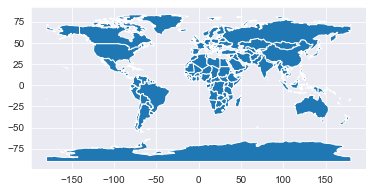

In [102]:
world.plot()

In [141]:
monde = pd.merge(world,sommePays,on='iso_a3')
monde.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,total
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1451
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3261
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",6


/var/folders/fd/s45tymvd3hldwld264_f2fnr0000gp/T/ipykernel_37619/4134395262.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  monde["center"] = monde["geometry"].centroid


467

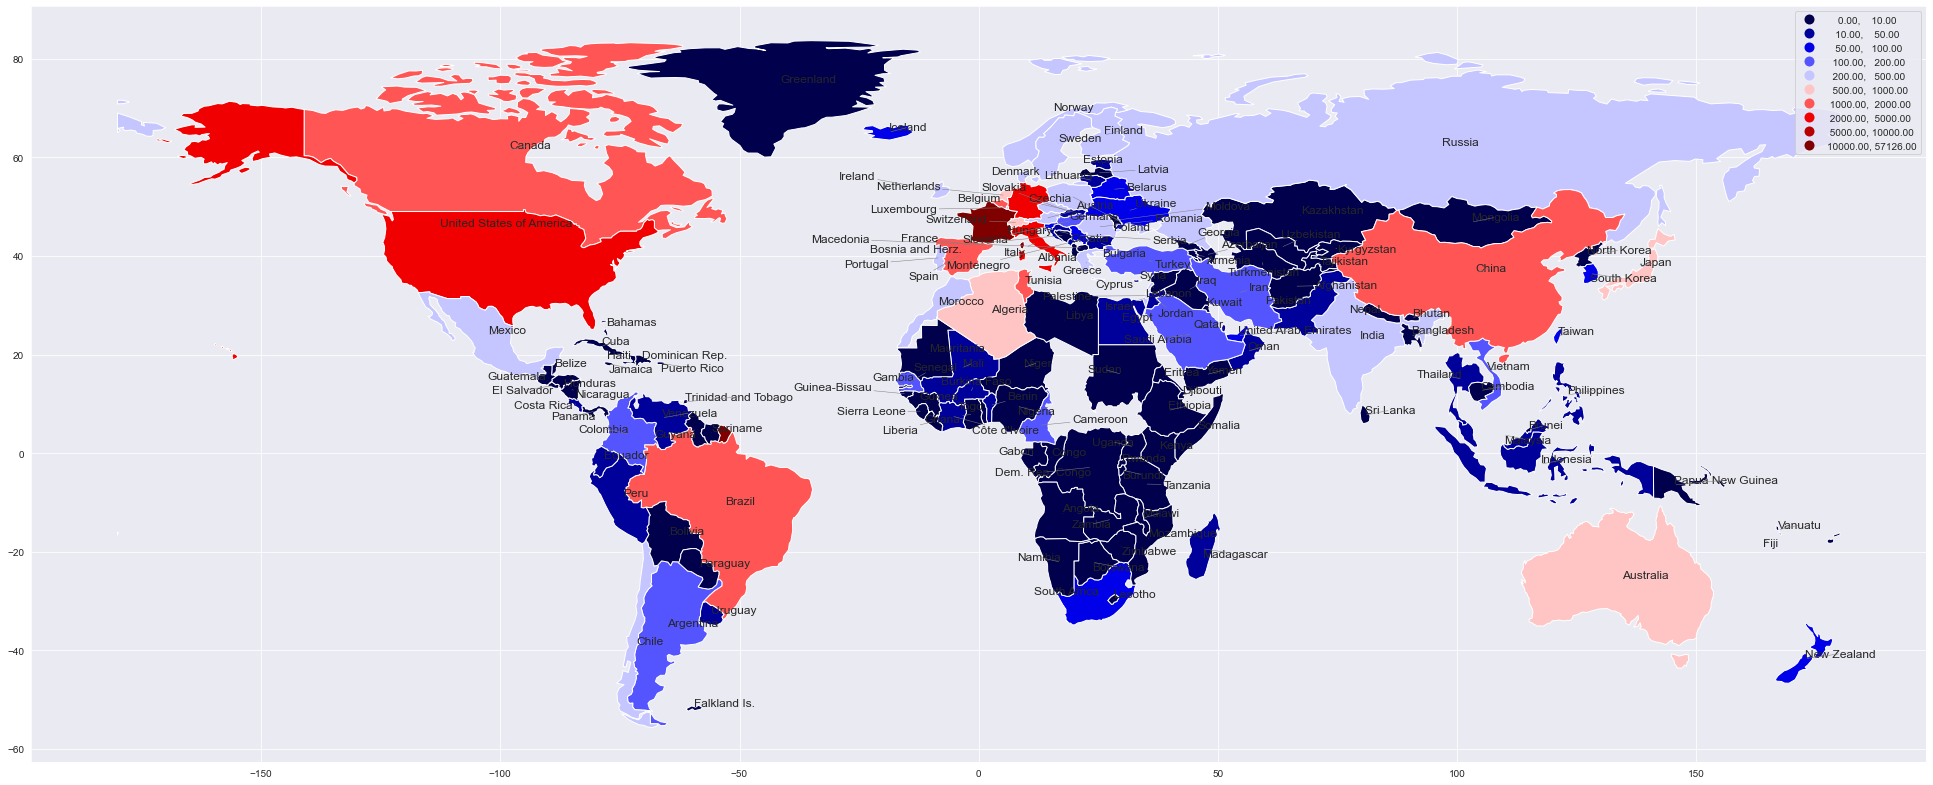

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(35,35))
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
#monde.plot(column='total', ax=ax, legend=True, scheme='quantiles')
monde.plot(column='total', ax=ax, legend=True, scheme='User_Defined', cmap='seismic', classification_kwds=dict(bins=[10,50,100,200,500,1000,2000,5000,10000]))
#monde.plot(column='total', ax=ax, legend=True, cax=cax, scheme='quantiles')
#for x, y, label in zip(monde.geometry.x, monde.geometry.y, monde.name):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
#calcul des points où rajouter les noms des pays
#cf. https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT
monde["center"] = monde["geometry"].centroid
monde_points = monde.copy()
monde_points.set_geometry("center", inplace=True)

texts=[]
for x, y, label in zip(monde_points.geometry.x, monde_points.geometry.y, monde_points["name"]):
    texts.append(plt.text(x, y, label, fontsize = 12))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1),
                   arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [126]:
colonnesNulles = [col for col in evolutionLabo2.columns if evolutionLabo2[col].max()==0]
print(colonnesNulles)
evolutionLabo2 = evolutionLabo2.drop(colonnesNulles, axis=1)
display(evolutionLabo2)

['Afghanistan', 'Åland, Îles', "Allemagne de l'EST", 'Andorre', 'Angola', 'Anguilla', 'Antarctique', 'Antigua et Barbuda', 'Antilles néerlandaises', 'Aruba', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Bélize', 'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)', 'Bonaire, Saint-Eustache et Saba', 'Bouvet, Ile', 'Brunéi Darussalam', 'Burundi', 'Cabo Verde', 'Caïmans, Iles', 'Christmas, île', 'Cocos/Keeling (Îles)', 'Comores', 'Congo', 'Cook, Iles', 'Corée, République populaire démocratique de', 'Curaçao', 'Djibouti', 'Dominicaine, République', 'Dominique', 'El Salvador', 'Erythrée', 'Falkland/Malouines (Îles)', 'Féroé, îles', 'Gabon', 'Gambie', 'Géorgie', 'Géorgie du sud et les îles Sandwich du sud', 'Gibraltar', 'Grenade', 'Guam', 'Guatemala', 'Guernesey', 'Guinée équatoriale', 'Guyana', 'Haïti', 'Heard, Ile et MacDonald, îles', 'Honduras', 'Île de Man', 'Îles mineures éloignées des Etats-Unis', 'Îles vierges britanniques', 'Îles vierges des Etats-Unis', "Indien (Territoire britannique

Nom,Afrique du Sud,Albanie,Algérie,Allemagne,Arabie Saoudite,Argentine,Arménie,Australie,Autriche,Bahrein,...,"Tchèque, République",Thaïlande,Tunisie,Turquie,Ukraine,Uruguay,Venezuela (République bolivarienne du),Viet Nam,Yémen,Zimbabwe
CRAN,0,0,36,43,9,6,0,57,16,0,...,0,11,98,2,0,1,1,3,0,0
CRIL,1,0,13,7,0,1,0,3,4,0,...,0,0,9,0,0,0,1,4,0,0
CRISTAL,4,0,51,76,3,2,0,25,37,0,...,18,1,65,6,2,0,0,2,1,0
ETIS,0,0,6,23,0,14,0,3,2,0,...,0,0,8,1,2,0,0,0,0,0
GIPSA,2,0,10,67,1,14,0,40,6,0,...,9,1,2,2,0,0,3,18,0,0
GREYC,1,0,35,26,2,3,0,3,0,0,...,1,1,19,0,0,1,0,0,0,0
HEUDIASYC,1,3,37,9,1,2,0,4,3,0,...,0,10,4,0,0,1,0,1,0,0
IPAL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I3S,0,0,2,50,3,15,0,21,17,0,...,6,0,9,0,1,0,1,9,0,0
IRIT,8,3,64,129,10,33,6,47,54,0,...,12,5,143,18,0,1,2,35,0,0


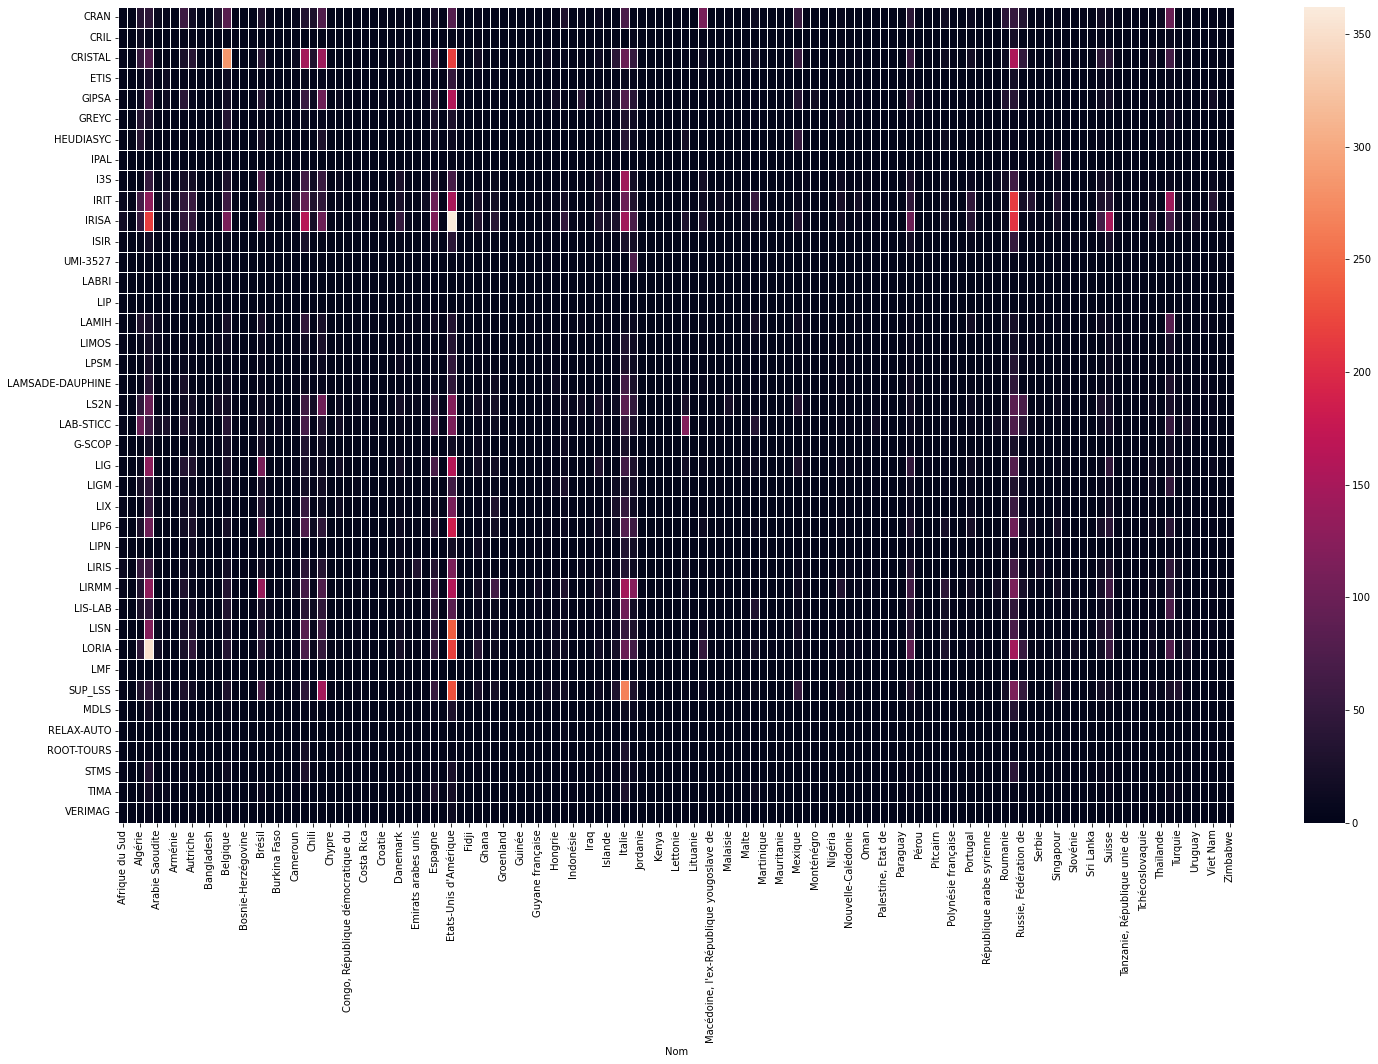

In [127]:
plt.figure(figsize=(25,15))
ax = seaborn.heatmap(evolutionLabo2, linewidths=1)

In [128]:
colonnesSup = [col for col in evolutionLabo2.columns if evolutionLabo2[col].max()<5]
print(colonnesSup)
evolutionLaboSup = evolutionLabo2.drop(colonnesSup, axis=1)
#display(evolutionLabo2)

['Albanie', 'Bahrein', 'Bangladesh', 'Bénin', 'Bosnie-Herzégovine', 'Botswana', 'Cambodge', 'Chypre', 'Congo, République démocratique du', 'Cuba', 'Ethiopie', 'Fidji', 'Ghana', 'Groenland', 'Guadeloupe', 'Guinée', 'Guinée-Bissau', 'Iraq', 'Jordanie', 'Kazakhstan', 'Kenya', 'Koweït', 'Lettonie', 'Lituanie', "Macédoine, l'ex-République yougoslave de", 'Martinique', 'Maurice', 'Mauritanie', 'Mayotte', 'Niger', 'Nigéria', 'Oman', 'Panama', 'Paraguay', 'Pitcairn', 'Polynésie française', 'Porto Rico', 'République arabe syrienne', 'Seychelles', 'Soudan', 'Sri Lanka', 'Tanzanie, République unie de', 'Tchad', 'Tchécoslovaquie', 'Yémen', 'Zimbabwe']


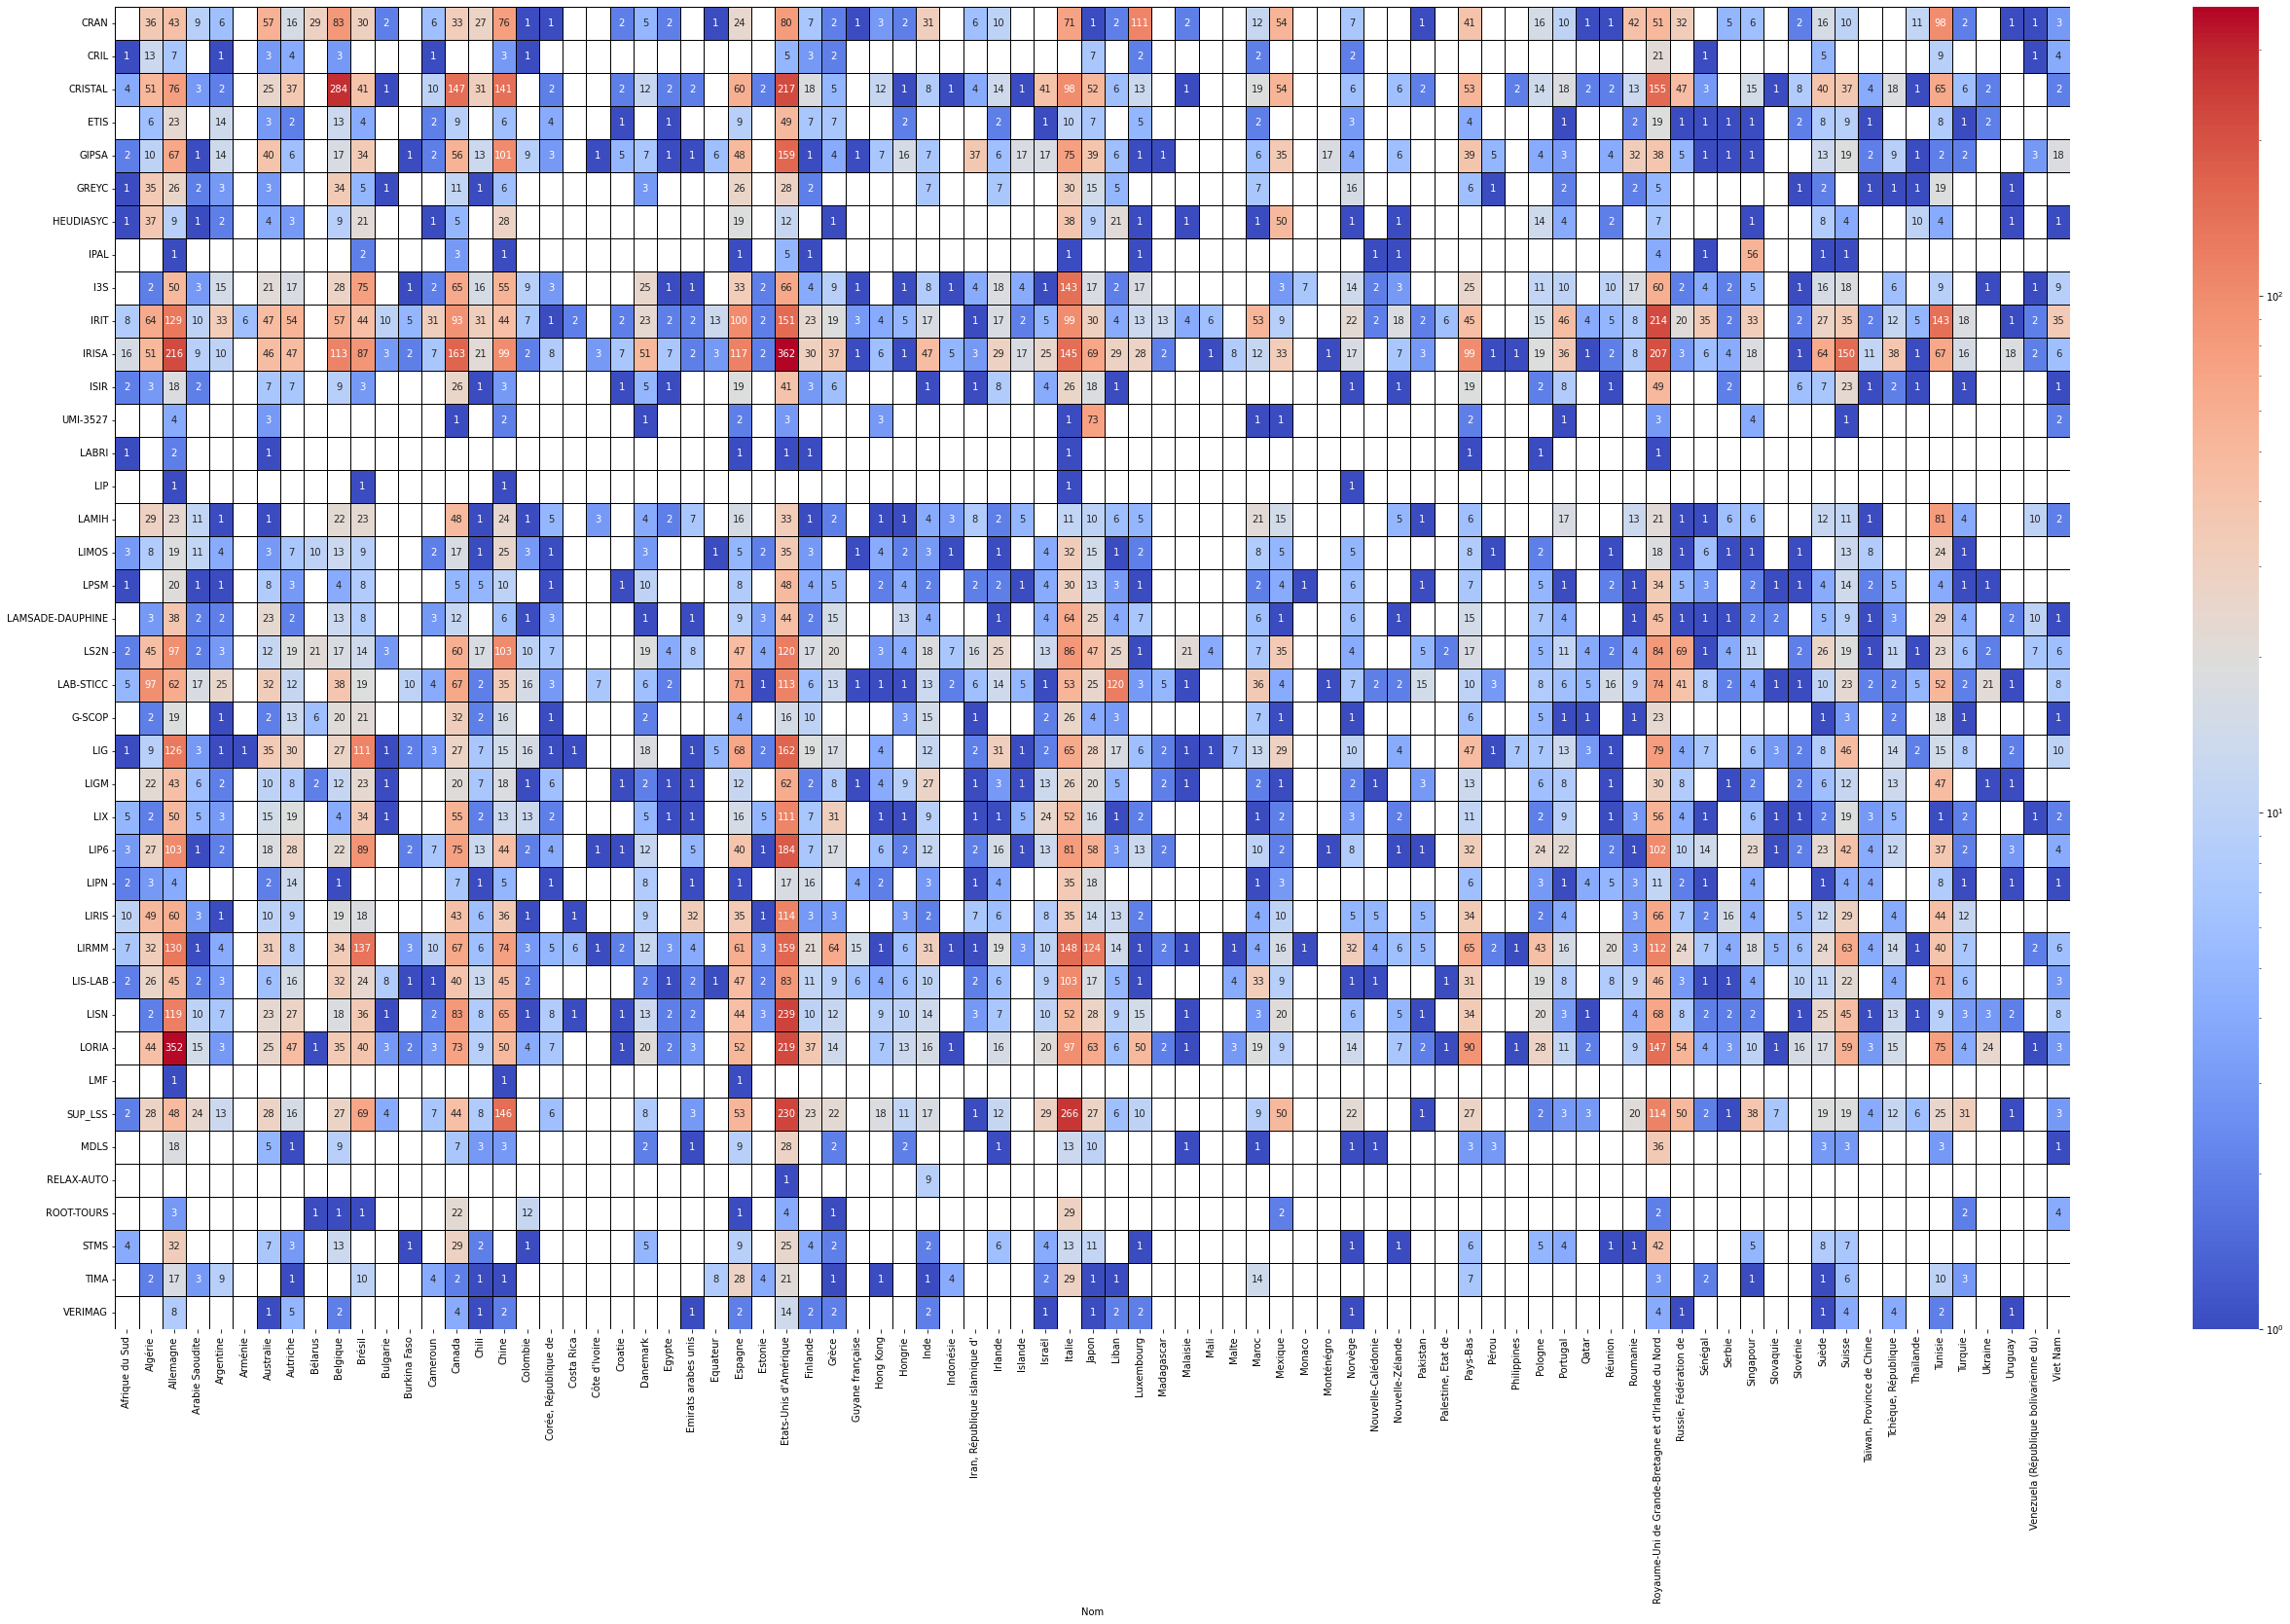

In [141]:
plt.figure(figsize=(45,25))
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
ax = seaborn.heatmap(evolutionLaboSup, linewidths=1, linecolor='black', cmap="coolwarm", norm=LogNorm(), annot=True, fmt="d")

In [90]:
evolutionLabo2 = evolutionLabo.assign(sumHorsFR = lambda x : x.sum(axis=1) - x.FR )
#evolutionLabo.assign(sumHorsFR = lambda x : x.sum(axis=1) - x.FR)
evolutionLabo2 = evolutionLabo2.assign(propHorsFR = lambda x : x.sumHorsFR / x.FR )
#evolutionLabo["Total"] = evolutionLabo.sum(axis=1)
#display(evolutionLabo.sumFr)

In [92]:
display(evolutionLabo2)

,AF,ZA,AX,AL,DZ,DE,DD,AD,AO,AI,...,VN,VD,WF,YE,YU,ZR,ZM,ZW,sumHorsFR,propHorsFR
CRAN,0,0,0,0,36,43,0,0,0,0,...,3,0,0,0,0,0,0,0,1256,0.652807
CRISTAL,0,4,0,0,51,76,0,0,0,0,...,2,0,0,1,0,0,0,0,2037,0.670286


## La liste des auteurs du LIRIS entre 2016 et 2020

In [62]:
lanceRequete("CNRS","labStructAcronym_s:LIRIS*&fq=producedDateY_i:[2016%20TO%202020]&rows=0&&facet=true&facet.field=structHasAuthId_fs&facet.prefix=2003_FacetSep_")

{
  "response": {
    "numFound": 1871,
    "start": 0,
    "docs": []
  },
  "facet_counts": {
    "facet_queries": {},
    "facet_fields": {
      "structHasAuthId_fs": [
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_674908_FacetSep_Djamal Benslimane",
        46,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_307062_FacetSep_Christian Wolf",
        43,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_757194_FacetSep_Samir Aknine",
        37,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_46964_FacetSep_Guillaume Beslon",
        36,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1668775_FacetSep_Eric Tannier",
        32,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_212248_FacetSep_David Coeurjolly",
        32,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1247523_FacetSep_Parisa Ghodous",
        30,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1224140_FacetSep_Noura Faci",
        29,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1200816_FacetSep_Angela Bonifati",
        28,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_693447_FacetSep_Mahmoud Barhamgi",
        28,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1108819_FacetSep_Sonia Ben Mokhtar",
        27,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1011685_FacetSep_Stefan Duffner",
        26,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_184772_FacetSep_Christine Solnon",
        26,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1113630_FacetSep_Mehdi Kaytoue",
        25,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_314872_FacetSep_C\u00e9line Robardet",
        25,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_374940_FacetSep_Youakim Badr",
        24,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_855381_FacetSep_Liming Chen",
        24,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_222208_FacetSep_Laure Tougne",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_298519_FacetSep_Christophe Garcia",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_620262_FacetSep_Chirine Ghedira",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_795840_FacetSep_Sara Bouchenak",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1164964_FacetSep_Elise Lavou\u00e9",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_167613_FacetSep_Sylvie Servigne",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_195084_FacetSep_La\u00ebtitia Matignon",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_206969_FacetSep_Hamamache Kheddouci",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_439784_FacetSep_Christophe Rigotti",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8

In [63]:
lanceRequete("CNRS","labStructAcronym_s:LIRIS*&fq=producedDateY_i:[2016%20TO%202020]&facet=true&facet.pivot=submitType_s,authIdHasPrimaryStructure_fs&rows=0&wt=json")

{
  "response": {
    "numFound": 1871,
    "start": 0,
    "docs": []
  },
  "facet_counts": {
    "facet_queries": {},
    "facet_fields": {},
    "facet_ranges": {},
    "facet_intervals": {},
    "facet_heatmaps": {},
    "facet_pivot": {
      "submitType_s,authIdHasPrimaryStructure_fs": [
        {
          "field": "submitType_s",
          "value": "file",
          "count": 1083,
          "pivot": [
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "46964_FacetSep_Guillaume Beslon_JoinSep_160051_FacetSep_Artificial Evolution and Computational Biology",
              "count": 32
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "46964_FacetSep_Guillaume Beslon_JoinSep_2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information",
              "count": 30
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1108819_FacetSep_Sonia Ben Mokhtar_JoinSep_394737_FacetSep_Distribution, Recherche d'Information et Mobilit\u00e9",
              "count": 24
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1113630_FacetSep_Mehdi Kaytoue_JoinSep_413086_FacetSep_Data Mining and Machine Learning",
              "count": 24
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1668775_FacetSep_Eric Tannier_JoinSep_160051_FacetSep_Artificial Evolution and Computational Biology",
              "count": 24
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1011685_FacetSep_Stefan Duffner_JoinSep_403930_FacetSep_Extraction de Caract\u00e9ristiques et Identification",
              "count": 23
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "307062_FacetSep_Christian Wolf_JoinSep_403930_FacetSep_Extraction de Caract\u00e9ristiques et Identification",
              "count": 23
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "184772_FacetSep_Christine Solnon_JoinSep_391965_FacetSep_Geometry Processing and Constrained Optimization",
              "count": 22
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1247523_FacetSep_Parisa Ghodous_JoinSep_393309_FacetSep_Service Oriented Computing",
              "count": 18
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "212248_FacetSep_David Coeurjolly_JoinSep_391965_FacetSep_Geometry Processing and Constrained Optimization",
              "count": 18
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1164964_FacetSep_Elise Lavou\u00e9_JoinSep_413091_FacetSep_Situated Interaction, Collaboration, Adaptation and Learning",
              "count": 17
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "531974_FacetSep_Marc Plantevit_JoinSep_413086_FacetSep_Data Mining and Machine Learning",
              "count": 17
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "908599_FacetSep_Aur\u00e9lien Tabard_JoinSep_413091_FacetSep_Situated Interaction, Collaboration, Adaptation and Learning",
              "count": 17
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "167613_FacetSep_Sylvie Servigne_JoinSep_401125_FacetSep_Base de Donn\u00e9es",
              "count": 16
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1170678_FacetSep_St\u00e9phane Derrode_JoinSep_403930_FacetSep_Extraction de Caract\u00e9ristiques et Identification",
              "count":